# Supervised Learning- Logistic Regressions

Unlike linear regression, logistic regression does not try to predict the value of a numeric variable given a set of inputs. Instead, the output of logistic regression is the probability of a given point belonging to a specific class.

To understand the use of logistic regression, let's consider the following example. Suppose that you have dataset containing information about income and voting preferences. For this dataset, you can see that low-income voters tend to vote for candidate B, while high-income voters tend to favor candidate A.

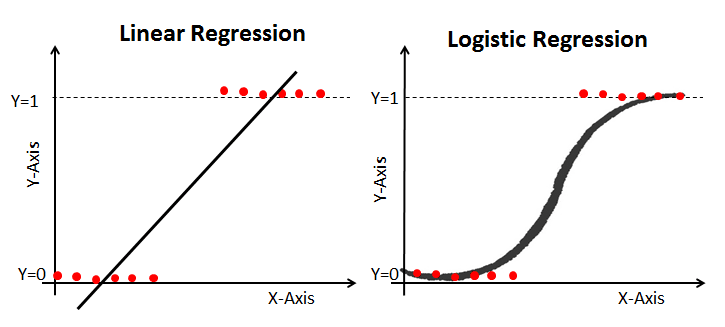

With this dataset, you would be very interested in trying to predict which candidate future voters will vote for based on their income level. At first glance, you might be tempted to apply what you have previously learned: a linear regression. The image on the left shows would happen when we apply linear regression to this problem.

The main problem with linear regression is that the predicted value doesn't always fall within an expected range. The image on the right shows how logistic regression solves this problem. Instead of drawing a straigh line cutting through the points, you now use a curved line to try to fit all the points on the chart.

Using logistic regression, the output will be a value from 0 to 1, where anything less than (or equal to ) 0.5 (known as the threshold) will be considered as voting for candidate B, and anything greater than 0.5 will be considered as voting for candidate A.

## Understanding Odds

Before we discuss the details of the logistic regression algorithm, we first need to discuss one import term -- *odds*. Odds are defined as the ratio of the probability of success to the probability of failure.

We use $p$ to represent the probability of an event occuring.

$$
\text{Odds for an even}=\frac{\text{Chances of something happening}}{\text{Chances of something not happening}}=\frac{p}{1-p}
$$

For example, the odds of landing a head when you flip a coin are 1. This is because you hae 0.5 probability of landing a head and 0.5 probability of landing a tail. So when you say that the odds of landing a head are 1, this means you have a 50 percent chance of landing a head.

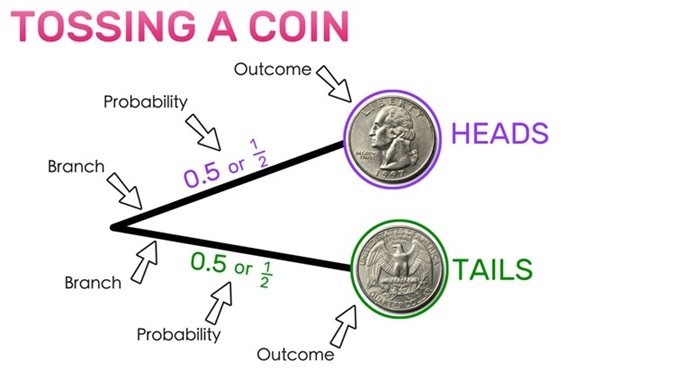

But if the coin is rigged in such a way that the probability of landing a head is 0.8 and the probability of landing a tail is 0.2, then the odds of landing a head is $\frac{0.8}{0.2}=4$. This means, you are 4 times more likely to land a head than a tail. 

Likewise, the odds of getting a tail are $\frac{0.2}{0.8}=0.25$

## Logit Function

Applying a natural logarithm function to the odds of an event, you get the logit function. The logit function is the logarithm of the odds.

$$
L=\ln\bigg(\frac{p}{1-p}\bigg)
$$

The logit function transfers a variable on the domain $(0,1)$ into a new variable on $(-\infty, \infty)$. 

### Importing the Modules

To understand this relationship, we are going to create an example using the `pandas`, `numpy`, and `matplotlib` libraries.

Text(0, 0.5, 'Logit -L')

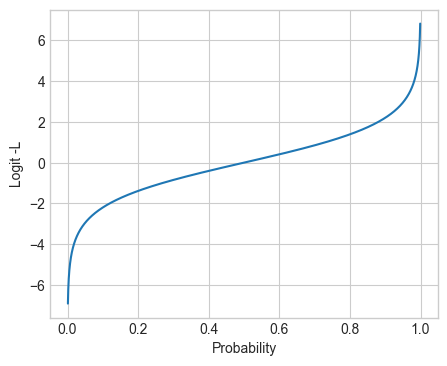

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def logit(x):
    return np.log(x / (1-x))

x = np.arange(0.001, 0.999, 0.0001)
y = [logit(n) for n in x]
plt.figure(figsize=(5,4))
plt.plot(x, y)
plt.xlabel("Probability")
plt.ylabel("Logit -L")

## Sigmoid Curve

For the logit curve, observe that the x-axis is the probability and the y-axis is the real-number range. For logistic regression, what we really want is a function that maps numbers on the real-number system to the probabilities, which is exactly what we get when we flip the axes of the logit curve.

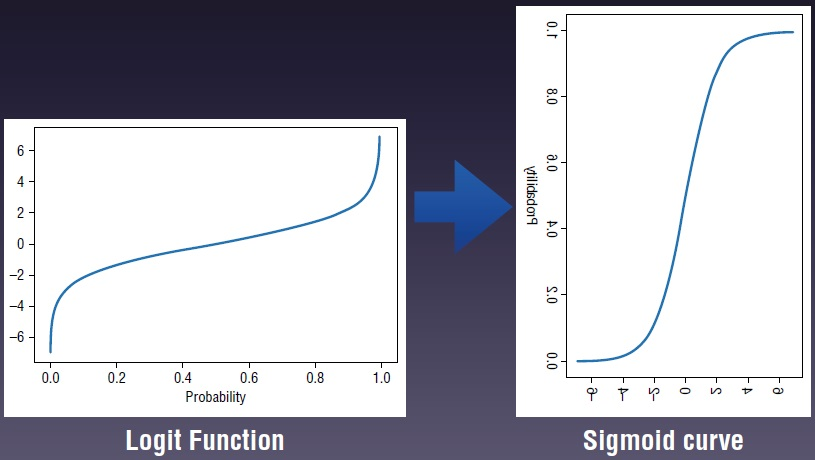

When you flip the axes, the curve that you get is called the *sigmoid curve*. The sigmoid curve is obtained by using the *Sigmoid function*, which is the inverse of the logit function. The Sigmoid function is used to transform the values $(-\infty, \infty)$ into numbers on $(0,1)$. The formula for the sigmoid function is

$$
p=\frac{1}{(1+e^{-L})}
$$

We can create a function that demonstrates the sigmoid function.

Text(0, 0.5, 'Probability')

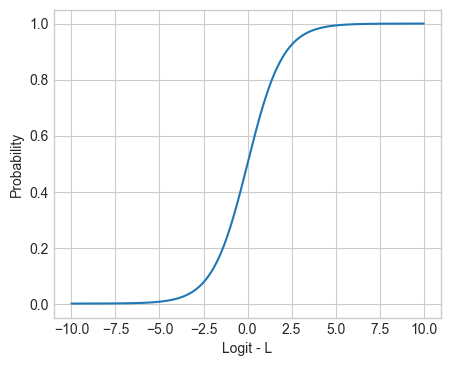

In [7]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.figure(figsize=(5,4))
plt.plot(x, y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

Just like you try to plot a straight line that fits through all of the points in linear regression, in logistics regression, we would also like to plot a sigmoid curve that fits through all of the points.

Matheamtically, this can be expressed by the following formula:

$$
p=\frac{1}{(1+e^{-(\beta_0+\beta_1x_1)})}
$$

Recall that the formula for the regression line is $\hat{y}=\beta_0+\beta_1x_1$, where $\beta_0$ is the y-intercept and $\beta_1$ is the coefficient for $x_1$. Here, we just replace $L$ for $\hat{y}$.

Just like a linear regression, the coefficients $\beta_0$ and $\beta_1$ are unknown, and they must be estimated based on the available training data. To estimate this, we use a technique known as *Maximum Likelihood Estimation (MLE)$.

## Breast Cancer Wisconsin (Dianostic) Data Set

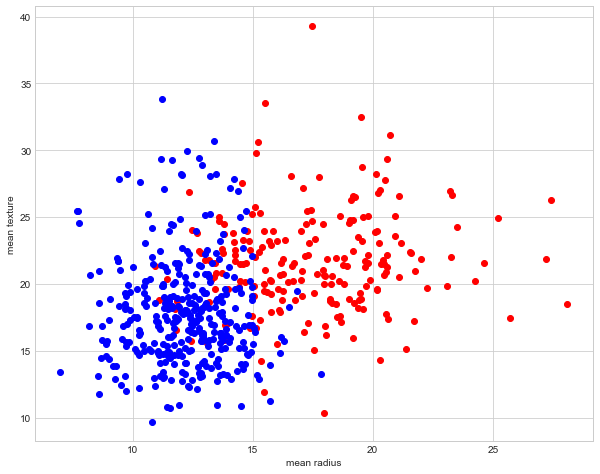

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d list---
X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)): # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture
            
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()


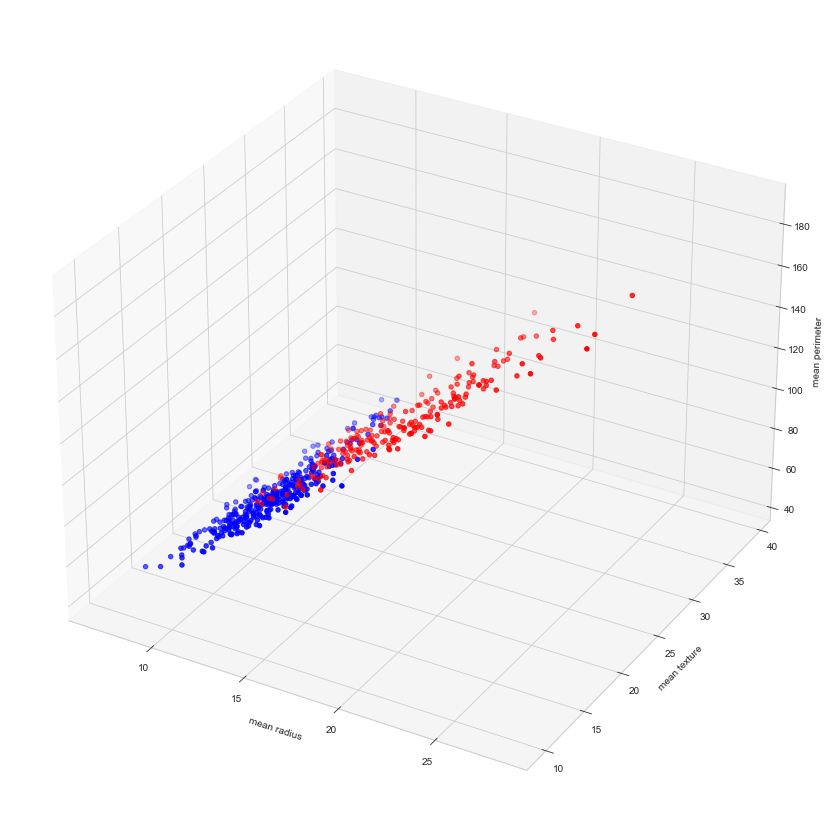

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)): # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])

colors = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colors[target])
    
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

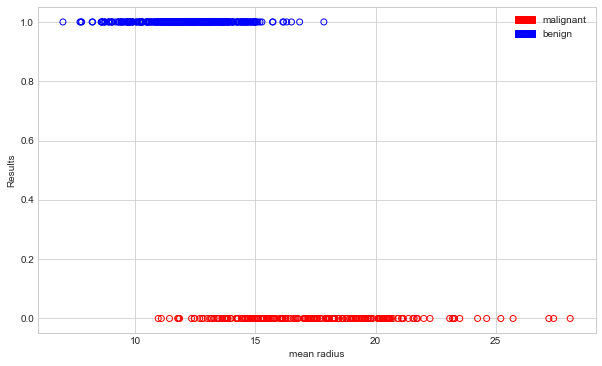

In [6]:
import matplotlib.patches as mpatches

cancer = load_breast_cancer()
X = cancer.data[:, 0]
y = cancer.target
color = {0: 'red', 1: 'blue'}

plt.figure(figsize=(10, 6))
plt.scatter(X,y, 
            facecolors = 'none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Results")

red = mpatches.Patch(color = 'red', label = 'malignant')
blue = mpatches.Patch(color = 'blue', label = 'benign')

plt.legend(handles = [red, blue], loc =1)

In [7]:

from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(X).reshape(len(X), 1),
                y=y)

#---print trained model intercept
print(log_regress.intercept_)

#---print trained model coefficients---
print(log_regress.coef_)


[15.120902]
[[-1.02475609]]


Text(0, 0.5, 'Probability')

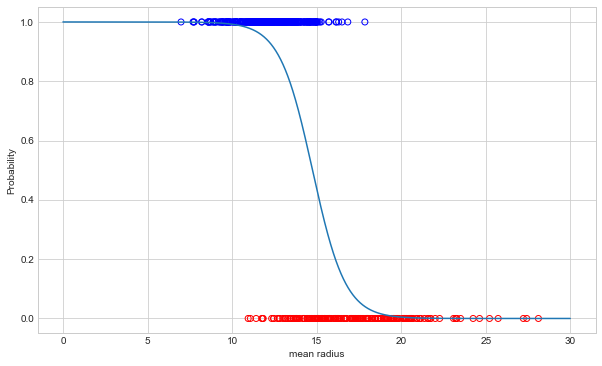

In [8]:
def sigmoid(x):
    return (1 / (1 +
        np.exp(-(log_regress.intercept_[0] +
        (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.figure(figsize=(10,6))
plt.scatter(X,y, 
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:
    colors[x]),
    cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

In [9]:
print(log_regress.predict_proba([[20]]))
print(log_regress.predict([[20]])[0])


[[0.99538685 0.00461315]]
0


In [10]:

print(log_regress.predict_proba([[8]]))
print(log_regress.predict([[8]])[0])

[[9.84046071e-04 9.99015954e-01]]
1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    cancer.data,
                                    cancer.target,
                                    test_size = 0.25,
                                    random_state = 1,
                                    stratify = cancer.target)

In [12]:
from sklearn import linear_model
X = X_train[:, 0:30]
y = y_train
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = X,
                y = y)

print(log_regress.intercept_)
print(log_regress.coef_)


[0.11177375]
[[ 0.62486536  0.38081998  0.42181052 -0.0260909  -0.01856499 -0.10039921
  -0.14228721 -0.05689117 -0.03452993 -0.00498867  0.02867197  0.19200173
   0.04991266 -0.12239059 -0.00162515 -0.02267043 -0.03162131 -0.00754228
  -0.00640247 -0.00220941  0.72600447 -0.45642548 -0.26447382 -0.00795009
  -0.03705552 -0.33425004 -0.42276876 -0.11570063 -0.10068326 -0.03174408]]


c:\Users\drebi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#---get the predicted probabilities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=X_test))

#---assign column name to prediction
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
preds = log_regress.predict(X=X_test)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(y_test)
original_result.columns = ["Original Result"]

#---merge the three dataframe into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())



   Malignant        Benign  Prediction  Original Result
0   0.999764  2.356649e-04           0                0
1   0.999864  1.360471e-04           0                0
2   0.179069  8.209309e-01           1                1
3   1.000000  1.276890e-08           0                0
4   0.116350  8.836500e-01           1                0


In [14]:
from sklearn import metrics

#---generate table of predictions vs actual
print("---Confusion Matrix---")
print(pd.crosstab(preds, y_test))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   5
1       5  85


In [15]:
print("---Accuracy---")
print(log_regress.score(X = X_test,
                        y = y_test))

---Accuracy---
0.9300699300699301


In [16]:
# View summary of common classification metrics
print("---Metrices---")
print(metrics.classification_report(
    y_true= y_test,
    y_pred= preds
))

---Metrices---
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.94      0.94      0.94        90

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



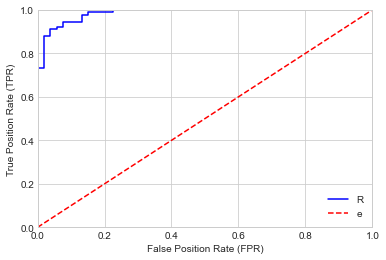

In [17]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(X_test)
preds = probs[:,1]

#---find the FPR, TPR, and threhold---
fpr, tpr, threshold = roc_curve(y_test, preds)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Position Rate (TPR)')
plt.xlabel('False Position Rate (FPR)')
plt.legend('Receiver Operating Character (ROC)')
plt.show()